In [7]:
#%load_ext autoreload
#%autoreload 1
import numpy as np
from numpy import random
#import matplotlib.pyplot as plt
#from lpVirtualOR import LBP
import itertools
import base
#%aimport base 
import timeit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
#Create Cases
bounds = [(1,5),(3,7),(6,10)]
means = [int(np.ceil(sum(b)/2)) for b in bounds]
stds = [np.sqrt(((b[1] - b[0] + 1)**2 - 1)/12)for b in bounds]
types = range(len(bounds))
#samplers = [lambda size,a=a,b=b: np.random.random_integers(a,b,size = size) for a,b in bounds]
samplers = [lambda size,a=a,b=b: np.random.uniform(a,b,size = size) for a,b in bounds]
sampler = base.Sampler(types,samplers)

In [9]:
cases = [0,1,2,1,0,2,0,0]

In [10]:
def check_K(K):
    N = len(K)
    if(K[0] != -1):
        return False
    for i in range(1,N):
        if(K[i] >= i):
            return False
    return True

In [24]:
D = 100
T = 2
beta = 20
gamma = 3
alpha = 10
step = 0.001
S = 1000
decimate = 100
num_in_list = 0
count = 0
M=1

start = timeit.default_timer()
print "Computing gradient..."

WT, K, TC,WC,IC,OC, ST,Y,Cost = base.gradient_2_batch(cases,sampler,step,alpha,beta,\
                                                                 gamma,D,T,S=S,decimate = decimate, M=M)
    
print "Gradient calculation done!"
end = timeit.default_timer()
print "Time taken: {}".format(end-start)

Computing gradient...
Gradient calculation done!
Time taken: 1.1534781456


Last K mapping is: [-1.  0.  1.  2.  3.  4.  5.  6.]


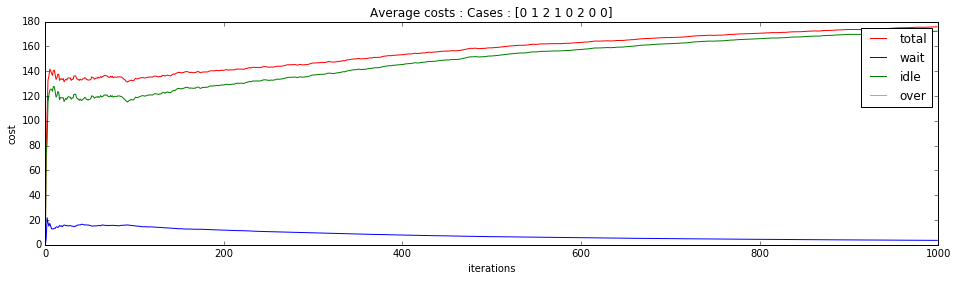

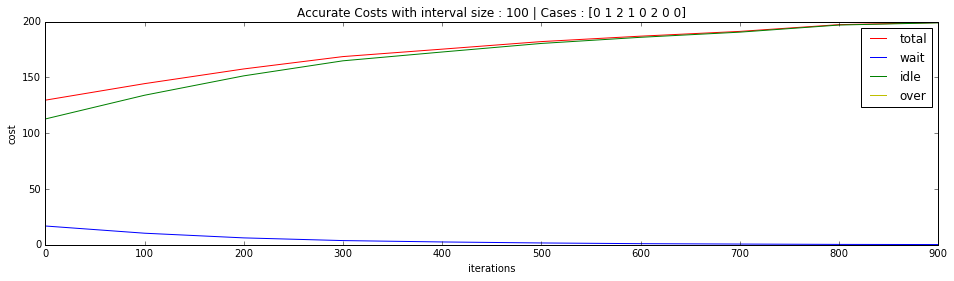

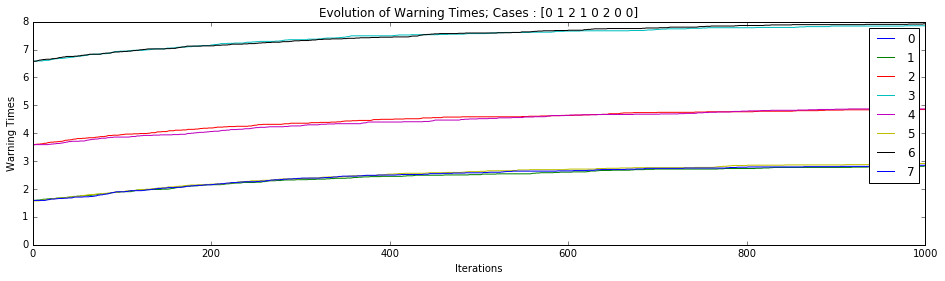

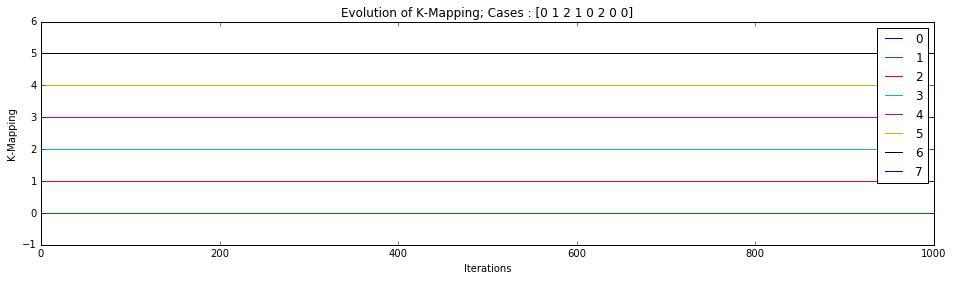

In [25]:
plt.figure(figsize=(16,4))
plt.plot(TC,"r",label= "total")
plt.plot(WC,"b",label= "wait")
plt.plot(IC,"g",label = "idle")
plt.plot(OC,"y",label = "over")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Average costs : " "Cases : " + np.array2string(np.array(cases)))
plt.legend()

plt.figure(figsize=(16,4))
iters = np.arange(S//decimate)*decimate
plt.plot(iters,Cost[:,0],"r",label= "total")
plt.plot(iters,Cost[:,1],"b",label= "wait")
plt.plot(iters,Cost[:,2],"g",label = "idle")
plt.plot(iters,Cost[:,3],"y",label = "over")
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Accurate Costs with interval size : " + str(decimate) +" | Cases : " + \
          np.array2string(np.array(cases)))
plt.legend()

plt.figure(figsize=(16,4))
for n in range(WT.shape[1]):
    plt.plot(WT[:,n], label = "{0}".format(n))
plt.xlabel("Iterations")
plt.ylabel("Warning Times")
plt.title("Evolution of Warning Times; Cases : " + np.array2string(np.array(cases)))
plt.legend()

plt.figure(figsize=(16,4))
for n in range(K.shape[1]):
    plt.plot(K[:,n], label = "{0}".format(n))
plt.xlabel("Iterations")
plt.ylabel("K-Mapping")
plt.title("Evolution of K-Mapping; Cases : " + np.array2string(np.array(cases)))
plt.legend()

print "Last K mapping is: {}".format(K[S-1,:])

In [26]:
### Control: Fix the K mapping to be fixed before anything has happened ###
Ks = []
# Control - all cases warned ahead of time
#Ks.append(-1 * ones(len(cases)))
Ks.append([-1,0,1,2,3,4,5,6])

print "=========================="
print "K vector created"
        
WT = np.empty(len(Ks),dtype="object")
TC = np.empty(len(Ks),dtype="object")
WC = np.empty(len(Ks),dtype="object")
IC = np.empty(len(Ks),dtype="object")
OC = np.empty(len(Ks),dtype="object")
Cost = np.empty(len(Ks),dtype="object")

start = timeit.default_timer()
print "Computing gradient..."


for i in range(len(Ks)):
    WT[i],TC[i],WC[i],IC[i],OC[i],Cost[i] = base.gradient_2_fixK(cases,Ks[i],sampler,step,alpha,beta,\
                                                                 gamma,D,T,S=S,decimate = decimate)
    
print "Gradient calculation done!"
end = timeit.default_timer()
print "Time taken: {}".format(end-start)

K vector created
Computing gradient...
Gradient calculation done!
Time taken: 0.46381688118


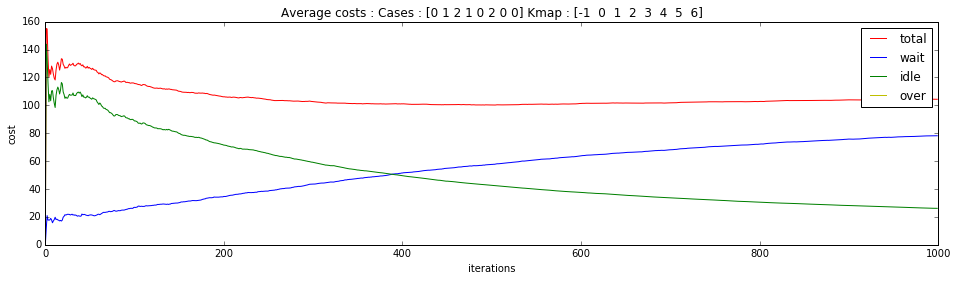

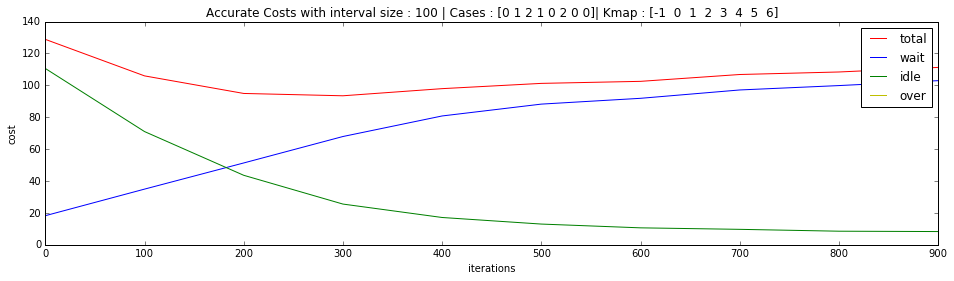

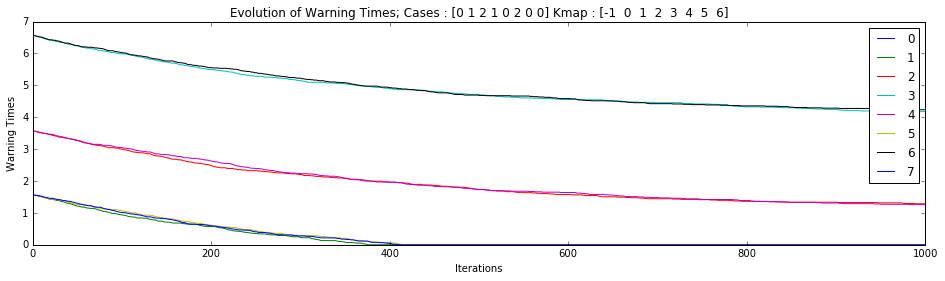

In [27]:
for i in range(len(Ks)):
    plt.figure(figsize=(16,4))
    plt.plot(TC[i],"r",label= "total")
    plt.plot(WC[i],"b",label= "wait")
    plt.plot(IC[i],"g",label = "idle")
    plt.plot(OC[i],"y",label = "over")
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("Average costs : " "Cases : " + np.array2string(np.array(cases)) + " Kmap : " + np.array2string(np.array(Ks[i])))
    plt.legend()
    plt.savefig("Convergence_Average.pdf")
    plt.figure(figsize=(16,4))
    iters = np.arange(S//decimate)*decimate
    plt.plot(iters,Cost[i][:,0],"r",label= "total")
    plt.plot(iters,Cost[i][:,1],"b",label= "wait")
    plt.plot(iters,Cost[i][:,2],"g",label = "idle")
    plt.plot(iters,Cost[i][:,3],"y",label = "over")
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.title("Accurate Costs with interval size : " + str(decimate) +" | Cases : " + \
              np.array2string(np.array(cases)) + "| Kmap : " + np.array2string(np.array(Ks[i])))
    plt.legend()
    plt.figure(figsize=(16,4))
    plt.title("Cases : " + np.array2string(np.array(cases)) + " Kmap : " + np.array2string(np.array(Ks[i])))
    for n in range(WT[i].shape[1]):
        plt.plot(WT[i][:,n], label = "{0}".format(n))
    plt.xlabel("Iterations")
    plt.ylabel("Warning Times")
    plt.title("Evolution of Warning Times; Cases : " + np.array2string(np.array(cases)) + \
              " Kmap : " + np.array2string(np.array(Ks[i])))
    plt.legend()

In [41]:
a = np.zeros(5)
a[0] = 1
a[1] = 2
a[2] = 3
np.sum(a[:1])

1.0